In [1]:
#!/usr/bin/env python3 

In [1]:
# Author: Mbonu Chinedum Endurance 
# Universtiy: 
# Description: 
# Date Created: 
# Date Modified: 

In [2]:
# Importing the necessary modules 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, Flatten 

In [36]:
# Setting the path to the dataset for training and testing 
train_dataset = "dataset/train-data.csv"
test_dataset = "dataset/test-data.csv"

# Loading both the test and train dataset into memory 
train_df = pd.read_csv(train_dataset, delimiter=',') 


# Getting Only the names of the car by splitting the values of the names in 
# the Name column 
train_df['BrandName'] = train_df['Name'].apply(lambda x: str(x).split(" ")[0])

# Cleaning the loaded dataframe by removing redudant columns 
train_df = train_df[['BrandName', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
                     'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

# Treating NaN values 
train_df.dropna()


# Loading the test dataset into memory 
test_df = pd.read_csv(test_dataset, delimiter=',')

# Cleaning the loaded dataframe by removing the redudant columns 
test_df = test_df[['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
                   'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price']]

In [37]:
# Setting some basic parametrs for matplotlib 
%matplotlib inline 
plt.style.use("ggplot")

# Viewing the head of the loaded dataframe 
train_df.head() 

,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [38]:
# Checking the information about the dataset 
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BrandName          6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 517.4+ KB


In [39]:
# Describing the loaded dataframe 
train_df.describe() 

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [40]:
# Displaying the shape of the loaded dataframe 
print(train_df.shape)
print(test_df.shape)

(6019, 11)
(1234, 12)


In [41]:
# Viewing the head of the loaded dataframe 
train_df.head() 

,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<h2> Visualization </h2> 

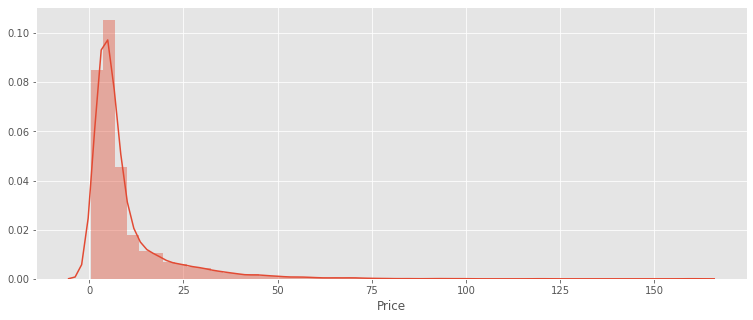

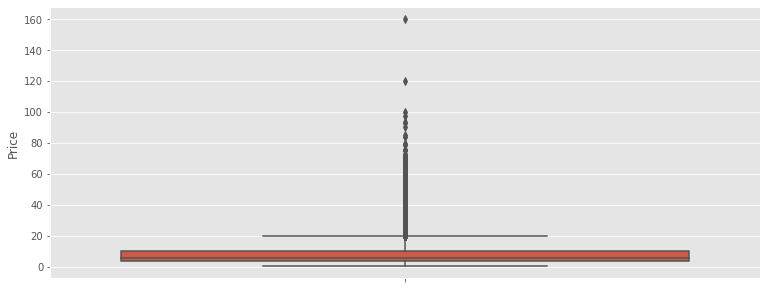

In [42]:
plt.figure(figsize=(28,5))
plt.subplot(1,2,1)
sns.distplot(train_df['Price'])

plt.figure(figsize=(28, 5))
plt.subplot(1,2,2)
sns.boxplot(y=train_df['Price'])
plt.show()

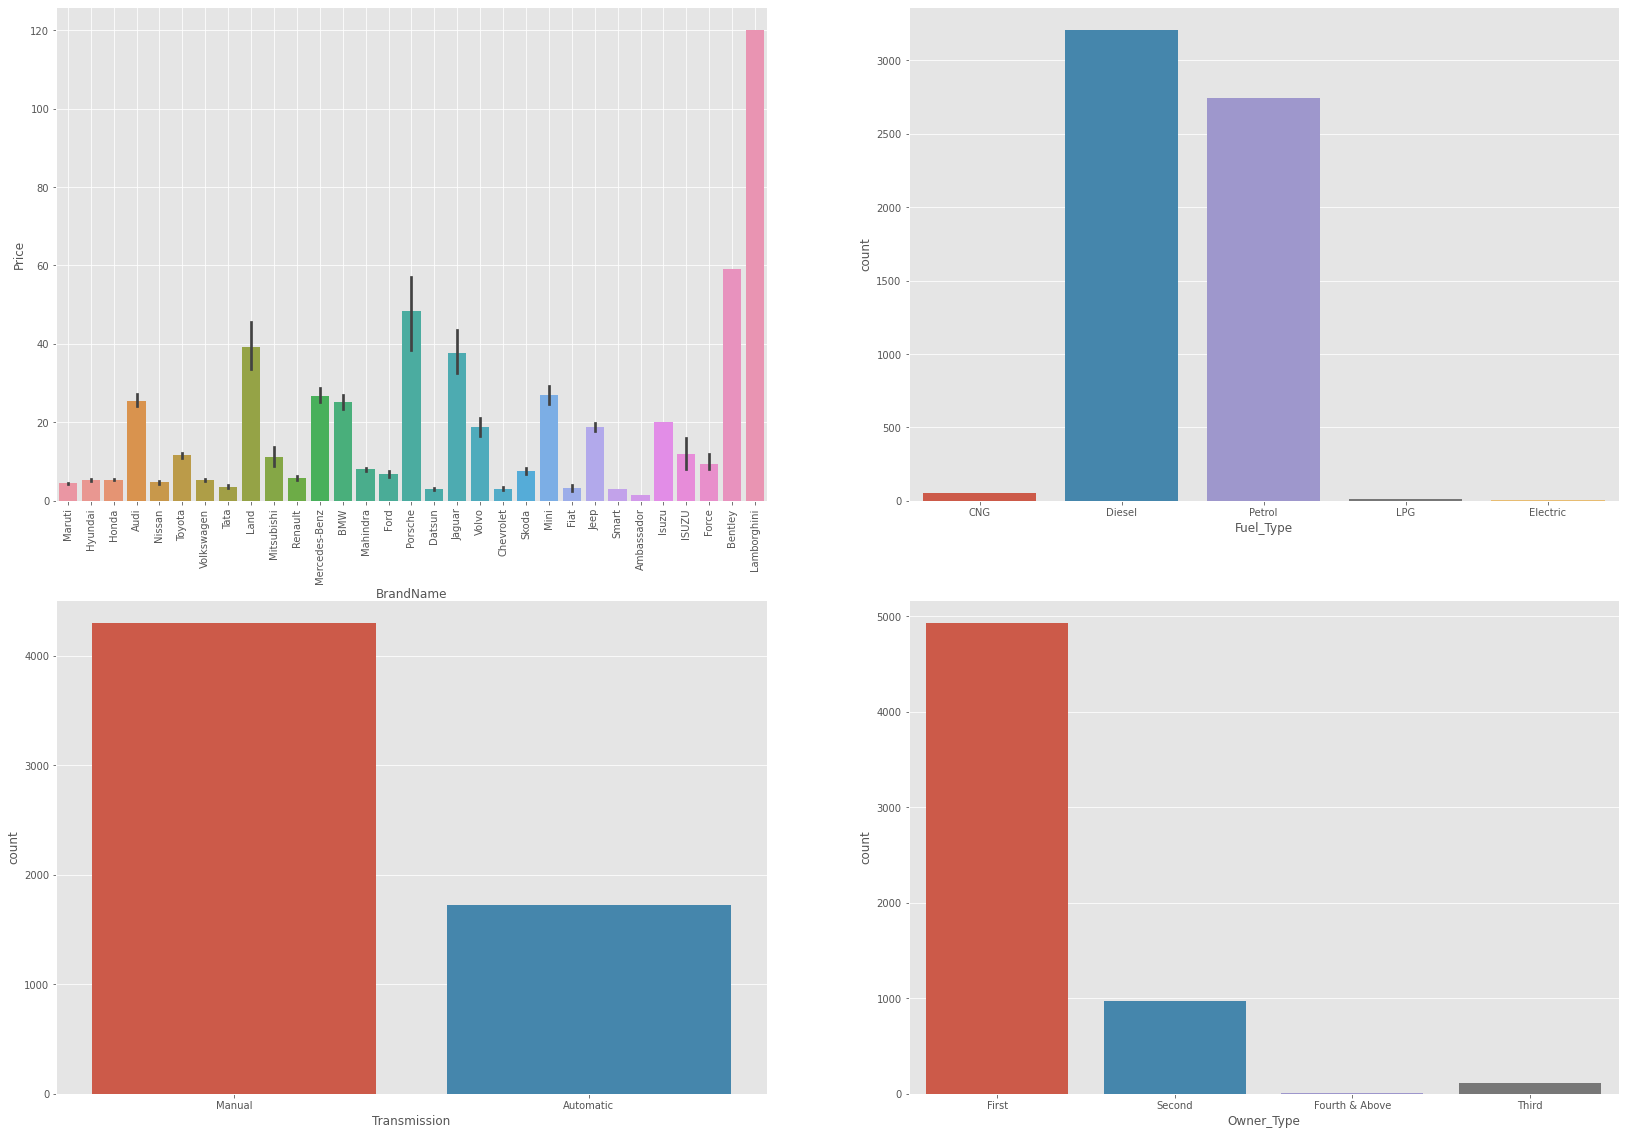

In [43]:
# 
fig = plt.figure(figsize=(28, 20))
# 
fig.subplots_adjust(hspace=0.2, wspace=0.2) 
# 
fig.add_subplot(2, 2, 1)
plot1 = sns.barplot(x='BrandName', y='Price', data=train_df)
plt.grid(True)
loc, labels = plt.xticks() 
plot1.set_xticklabels(labels, rotation=90) 

# 
fig.add_subplot(2, 2, 2) 
plot2 = sns.countplot(x='Fuel_Type', data=train_df) 
loc, labels = plt.xticks() 
plot2.set_xticklabels(labels, rotation=0)

#
fig.add_subplot(2, 2, 3)
plot3 = sns.countplot(x='Transmission', data=train_df)
loc, labels = plt.xticks() 
plot3.set_xticklabels(labels, rotation=0)

#
fig.add_subplot(2, 2, 4) 
plot4 = sns.countplot(x='Owner_Type', data=train_df)
loc, labels = plt.xticks() 
plot4.set_xticklabels(labels, rotation=0)

# Displaying the graph 
plt.show() 

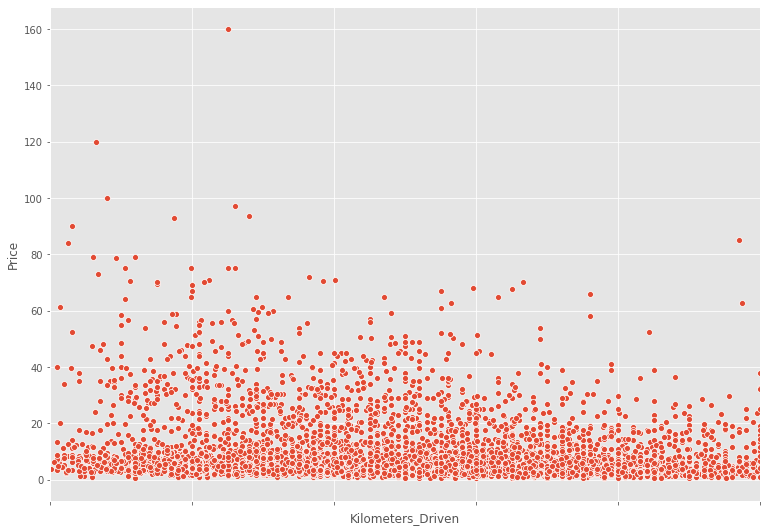

In [44]:
# 
fig = plt.figure(figsize=(28, 20))
# 
fig.subplots_adjust(hspace=0.2, wspace=0.2) 
# 
fig.add_subplot(2, 2, 1)
plt.xlim([0, 100000])
plot1 = sns.scatterplot(x='Kilometers_Driven', y='Price', data=train_df)
plt.grid(True)
loc, labels = plt.xticks() 
plot1.set_xticklabels(labels, rotation=90) 


plt.show()

In [45]:
# Viewing the head of the loaded dataframe 
train_df.head() 

,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<h2> Data Cleaning </h2> 

In [47]:
# Getting the unique names of cars in the loaded dataframe  
CarNames = list(train_df['BrandName'].unique()) 
print('Unique No Of Car Names: {}'.format(len(CarNames))) 

# Getting the unique names of the cars engines in the loaded dataframe 
EngineNames = list(train_df['Engine'].unique())
print('Unique No Of Engine Names: {}'.format(len(EngineNames))) 

# Getting the unique names of the fuel type name 
FuelTypeNames = list(train_df['Fuel_Type'].unique())
print('Unique No Of Car Fuel Types: {}'.format(len(FuelTypeNames)))

# Getting the unique name of transmission for the cars purchased  
TransmissionNames = list(train_df['Transmission'].unique())
print('Unique No Of Transmission Names: {}'.format(len(TransmissionNames)))

Unique No Of Car Names: 31
Unique No Of Engine Names: 147
Unique No Of Car Fuel Types: 5
Unique No Of Transmission Names: 2


In [48]:
# Splitting the Mileage columns and seperating the value and its corresponding units 
mileage = train_df['Mileage'].str.split(" ", n=1, expand=True)
# Taking only the value and leaving the units 
train_df['Mileage'] = pd.DataFrame(mileage[0]) 
# Converting to numerical values 
train_df['Mileage'] = pd.to_numeric(train_df['Mileage'], errors='coerce')

# Splitting the Engine columns and seperating the value and its corresponding units 
engine = train_df['Engine'].str.split(" ", n=1, expand=True) 
# Taking only the value and leaving the units 
train_df['Engine'] = pd.DataFrame(engine[0])
# Converting to numerical values 
train_df['Engine'] = pd.to_numeric(train_df['Engine'], errors='coerce')

# Splitting the Power Rating columns and seperating the values and its corresponding units 
power = train_df['Power'].str.split(" ", n=1, expand=True) 
# Taking only the value and leaving the units 
train_df['Power'] = pd.DataFrame(power[0])
# Converting to numerical values 
train_df['Power'] = pd.to_numeric(train_df['Power'], errors='coerce')

# Creating a dictionary to hold the type of fuel type for the cars  
FuelType = {
    "CNG": 0, "Diesel": 1, 
    "Petrol": 2, "LPG": 3, "Electric": 4 }

# Mapping the created dictionary for fuel type with the column in the loaded dataframe 
train_df['Fuel_Type'] = train_df['Fuel_Type'].map(FuelType)

# Creating a dictionary to hold the type of the transmission type 
Transmission = {
    "Manual": 0, "Automatic": 1 }

# Mapping the created dictionary for transmission type with the column in the loaded dataframe
train_df['Transmission'] = train_df['Transmission'].map(Transmission)

# Creating a dictionary to hold the type of Vehicle ownertype
OwnerType = {
    "First": 0, "Second": 1, "Third": 2, 
    "Fourth & Above": 3 }

# Mapping the created dictionary for Ownertype with the column in the loaded dataframe
train_df['Owner_Type'] = train_df['Owner_Type'].map(OwnerType)

# Restructing the names of the columns and removing columns that are not needed in the dataframe 
train_df = train_df[['BrandName', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
             'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [49]:
# Viewing the head of the cleaned dataframe 
train_df.head() 

,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,2010,72000,0,0,0,26.60,998.0,58.16,5.0,1.75
1,Hyundai,2015,41000,1,0,0,19.67,1582.0,126.20,5.0,12.50
2,Honda,2011,46000,2,0,0,18.20,1199.0,88.70,5.0,4.50
3,Maruti,2012,87000,1,0,0,20.77,1248.0,88.76,7.0,6.00
4,Audi,2013,40670,1,1,1,15.20,1968.0,140.80,5.0,17.74


In [50]:
# Getting the unique values for the brand name and mapping it to a numeric number for 
# Easy predictions 
BrandName = list(train_df['BrandName'].unique())  
# Displaying the brand name 
print("The Car Brand Name is: \n{}".format(BrandName)) 

# Creating a dictionary to hold the names of the Unique brand name to an assigned number 
BrandName = {
    "Maruti": 0, "Hyundai": 1, "Honda": 2, "Audi": 3, "Nissan": 4, "Toyota": 5, 
    "Volkswagen": 6, "Tata": 7, "Land": 8, "Mitsubishi": 9, "Renault": 10, "Mercedes-Benz": 11,
    "BMW": 12, "Mahindra": 13, "Ford": 14, "Porsche": 15, "Datsun": 16, "Jaguar": 17, "Volvo": 18, "Chevrolet": 19,
    "Skoda": 20, "Mini": 21, "Fiat": 22, "Jeep": 23, "Smart": 24, "Ambassador": 25, "Isuzu": 26, "ISUZU": 27, "Force": 28,
    "Bentley": 29, "Lamborghini": 30 }

# # Creating a dictionary to hold the names of the unique location that the cars was bought 
# LocationName = {
#     "Mumbai": 0, "Pune": 1, "Chennai": 2, "Coimbatore": 3, "Hyderabad": 4, "Jaipur": 5,
#     "Kochi": 6, "Kolkata": 7, "Delhi": 8, "Bangalore": 9, "Ahmedabad": 10 }

# Mapping 
train_df['BrandName'] = train_df['BrandName'].map(BrandName)

The Car Brand Name is: 
['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini']


<h2> Model Building </h2> 

In [51]:
train_df.tail() 

,BrandName,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,0,2014,27365,1,0,0,28.40,1248.0,74.0,5.0,4.75
6015,1,2015,100000,1,0,0,24.40,1120.0,71.0,5.0,4.00
6016,13,2012,55000,1,0,1,14.00,2498.0,112.0,8.0,2.90
6017,0,2013,46000,2,0,0,18.90,998.0,67.1,5.0,2.65
6018,19,2011,47000,1,0,0,25.44,936.0,57.6,5.0,2.50


In [53]:
# Splitting the dataset into input(x) and Output(y) features 
# 
X = train_df[['BrandName', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
                     'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']].values

#
y = train_df['Price'].values

# 
scaler = StandardScaler() 
scaler.fit(X)

# 
X_scaled = scaler.fit_transform(X)

# 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                   test_size=0.20, 
                                                   random_state=2)

In [54]:
# Shape of input data 


In [66]:
model = XGBRegressor() 
model.fit(X_scaled, y)

model.score(X_test, y_test)

0.9930401515562205

<h2> Model Serialization </h2> 

In [67]:
import pickle 
import joblib as jb 

In [68]:
# Saving the model file and the scaler model 
CombinedParams = (model, scaler)

# Saving the params 
jb.dump(CombinedParams, 'model/CombinedModel.pb')

['model/CombinedModel.pb']

In [69]:
# load the model 
model, scaler = jb.load('model/CombinedModel.pb')

In [76]:
input_features = [0.5, 2011, 47000, 1, 0, 0, 25.44, 936.0, 57.60, 5.0]
input_features = np.array(input_features).reshape(1, -1)

input_features = scaler.transform(input_features)

In [77]:
model.predict(X_train[0].reshape(1, -1))

array([4.1556067], dtype=float32)

In [72]:
X_test.shape

(1204, 10)

In [73]:
input_features

array([[-0.93632568, -0.72127858, -0.12862391, -0.86593109, -0.63252909,
        -0.44455356,  1.59432239, -1.13964873, -1.03309197, -0.34464001]])

In [74]:
X_train[0]

array([ 0.70545608, -0.10955873, -0.01904839, -0.86593109, -0.63252909,
       -0.44455356,  0.79989358, -0.26654769, -0.65440515, -0.34464001])

In [75]:
y_train[0]

4.61